In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/telco_churn_data.csv')
df.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   
2              Yes   Fiber Optic                       57              No   
3              Yes   Fiber Optic                       13              No   
4              Yes         Cable                       15              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   
2            No                     No                   No          Yes   
3           Yes                    Yes                   No          Yes   
4            No                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   
2              Yes             Yes            Yes  Month-to-Month   
3              Yes              No             No  Month-to-Month   
4               No              No             No  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal          41.236                  39.65   
1               Yes      Credit Card          83.876                 633.30   
2               Yes  Bank Withdrawal          99.268                1752.55   
3               Yes  Bank Withdrawal         102.440                2514.50   
4               Yes  Bank Withdrawal          79.560                2868.15   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                         0.00   
1           0.00                     120.0                       390.80   
2          45.61                       0.0                       203.94   
3          13.43                     327.0                       494.00   
4           0.00                     430.0                       234.21   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   
3  Female   78       No            Yes     Yes        Yes   
4  Female   80       No            Yes     Yes        Yes   

   Number of Dependents         City  Zip Code   Latitude   Longitude  \
0                     0  Los Angeles     90022  34.023810 -118.156582   
1                     1  Los Angeles     90063  34.044271 -118.185237   
2                     3  Los Angeles     90065  34.108833 -118.229715   
3                     1    Inglewood     90303  33.936291 -118.332639   
4                     1     Whittier     90602  33.972119 -118.020188   

   Population  Churn 

# Data Preprocessing Part 1

In [4]:
# Drop identifier column
df.drop(columns = ['Customer ID', 'Zip Code'], inplace=True)
df.head()

Referred a Friend  Number of Referrals  Tenure in Months    Offer  \
0                No                    0                 1     None   
1               Yes                    1                 8  Offer E   
2                No                    0                18  Offer D   
3               Yes                    1                25  Offer C   
4               Yes                    1                37  Offer C   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   
2           Yes                              11.33            Yes   
3           Yes                              19.76             No   
4           Yes                               6.33            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   
2              Yes   Fiber Optic                       57              No   
3              Yes   Fiber Optic                       13              No   
4              Yes         Cable                       15              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   
2            No                     No                   No          Yes   
3           Yes                    Yes                   No          Yes   
4            No                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   
2              Yes             Yes            Yes  Month-to-Month   
3              Yes              No             No  Month-to-Month   
4               No              No             No  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal          41.236                  39.65   
1               Yes      Credit Card          83.876                 633.30   
2               Yes  Bank Withdrawal          99.268                1752.55   
3               Yes  Bank Withdrawal         102.440                2514.50   
4               Yes  Bank Withdrawal          79.560                2868.15   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                         0.00   
1           0.00                     120.0                       390.80   
2          45.61                       0.0                       203.94   
3          13.43                     327.0                       494.00   
4           0.00                     430.0                       234.21   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   
3  Female   78       No            Yes     Yes        Yes   
4  Female   80       No            Yes     Yes        Yes   

   Number of Dependents         City   Latitude   Longitude  Population  \
0                     0  Los Angeles  34.023810 -118.156582       68701   
1                     1  Los Angeles  34.044271 -118.185237       55668   
2                     3  Los Angeles  34.108833 -118.229715       47534   
3                     1    Inglewood  33.936291 -118.332639       27778   
4                     1     Whittier  33.972119 -118.020188       26265   

   Churn Value  CLTV   Churn Category                  Churn Reason  \
0         

In [5]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Referred a Friend            2
Offer                        6
Phone Service                2
Multiple Lines               2
Internet Service             2
Internet Type                4
Online Security              2
Online Backup                2
Device Protection Plan       2
Premium Tech Support         2
Streaming TV                 2
Streaming Movies             2
Streaming Music              2
Unlimited Data               2
Contract                     3
Paperless Billing            2
Payment Method               3
Gender                       2
Under 30                     2
Senior Citizen               2
Married                      2
Dependents                   2
City                      1106
Churn Category               5
Churn Reason                20
dtype: int64

In [6]:
# Remove column with unique value more than 100 and remove unused column like the reson and category of churn
df.drop(columns = ['City', 'Churn Category', 'Churn Reason'], inplace=True)

In [7]:
df.shape

(7043, 41)

In [8]:
# Replace 1 with 'yes' and 0 with 'no' in the categorical column
df['Churn Value'] = df['Churn Value'].replace({0: 'no', 1: 'yes'})

# Exploratory Data Analysis

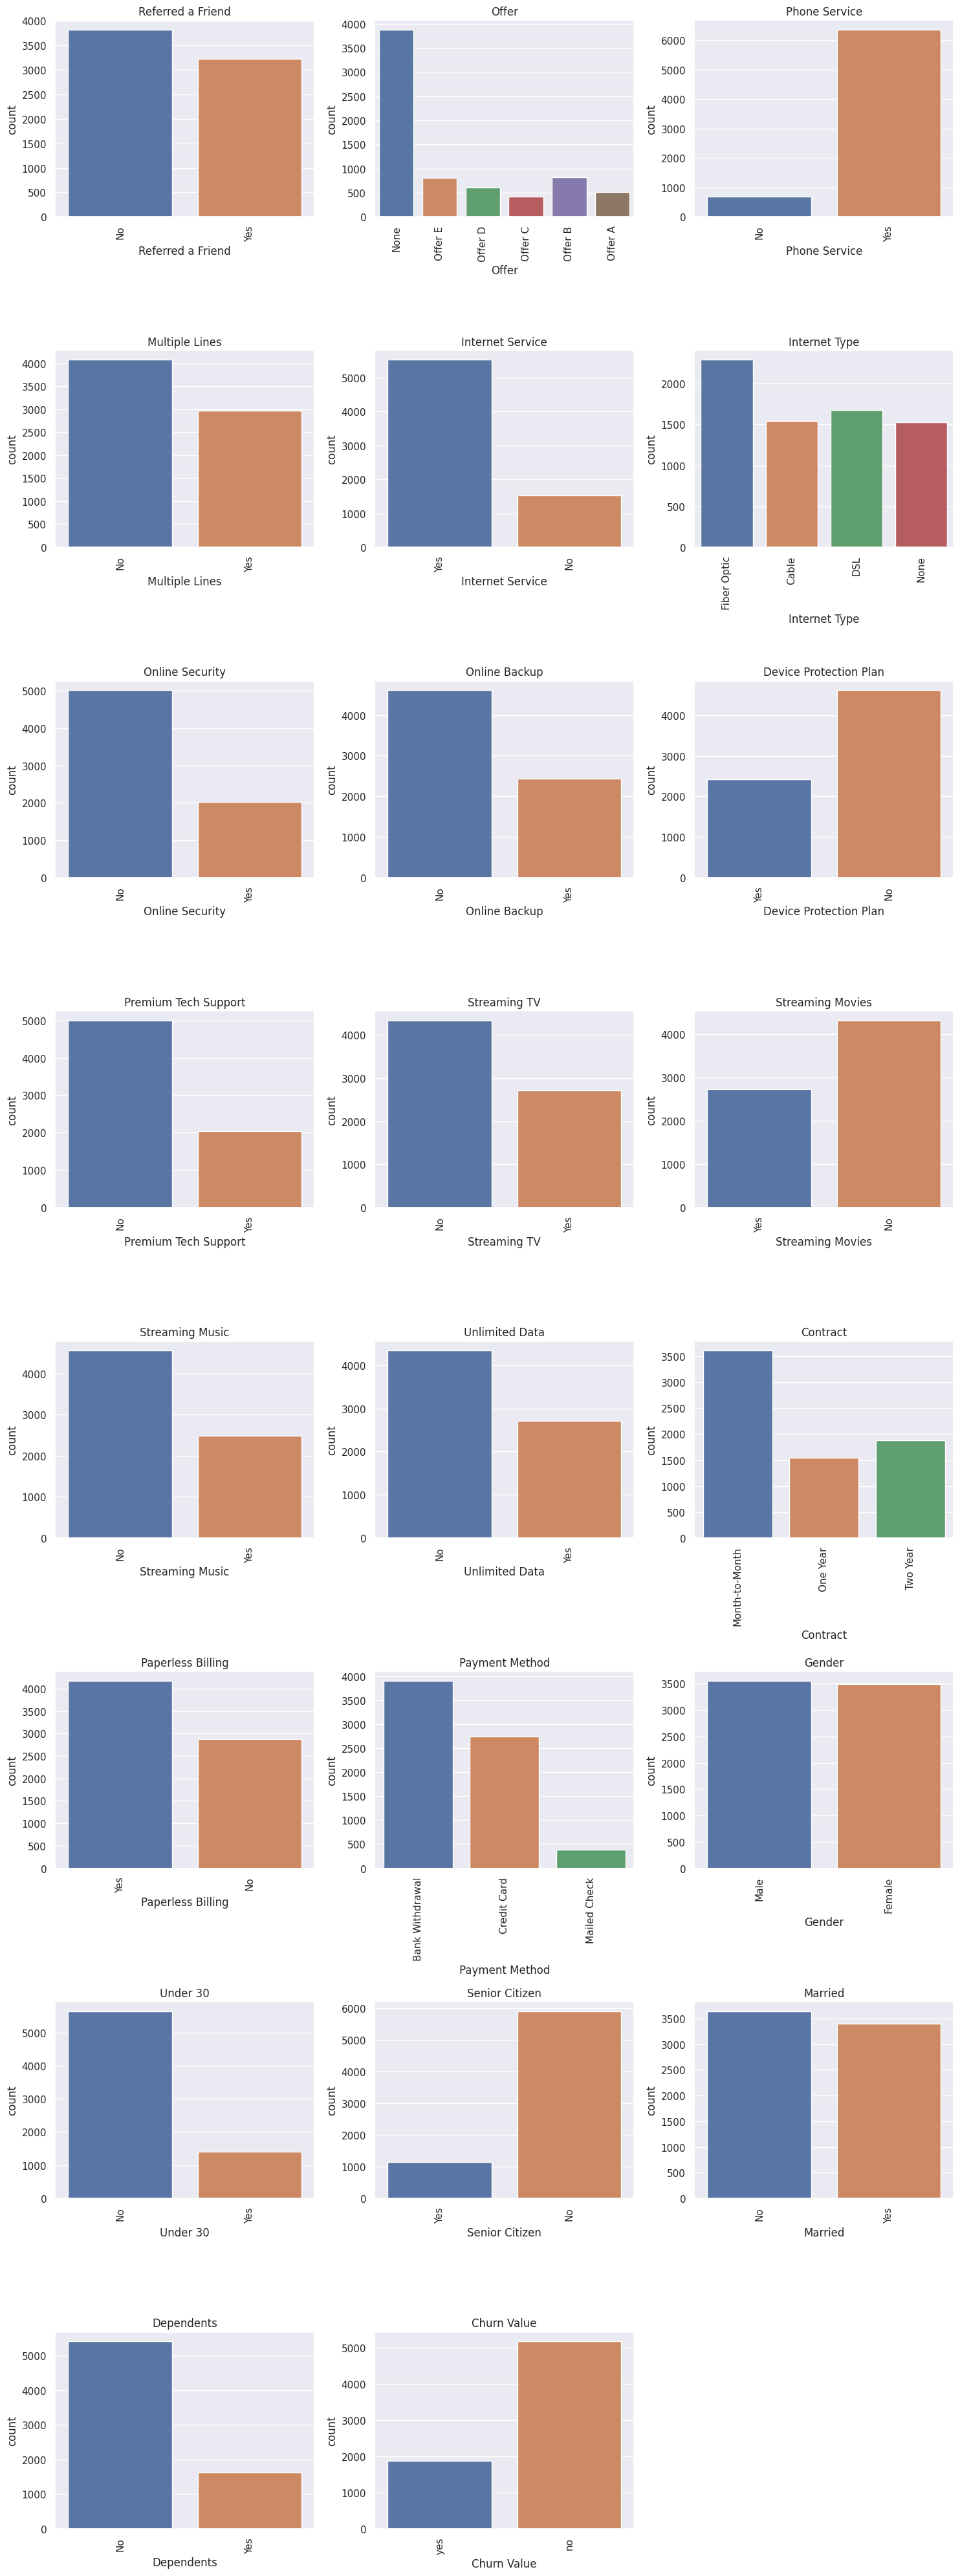

In [9]:
# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

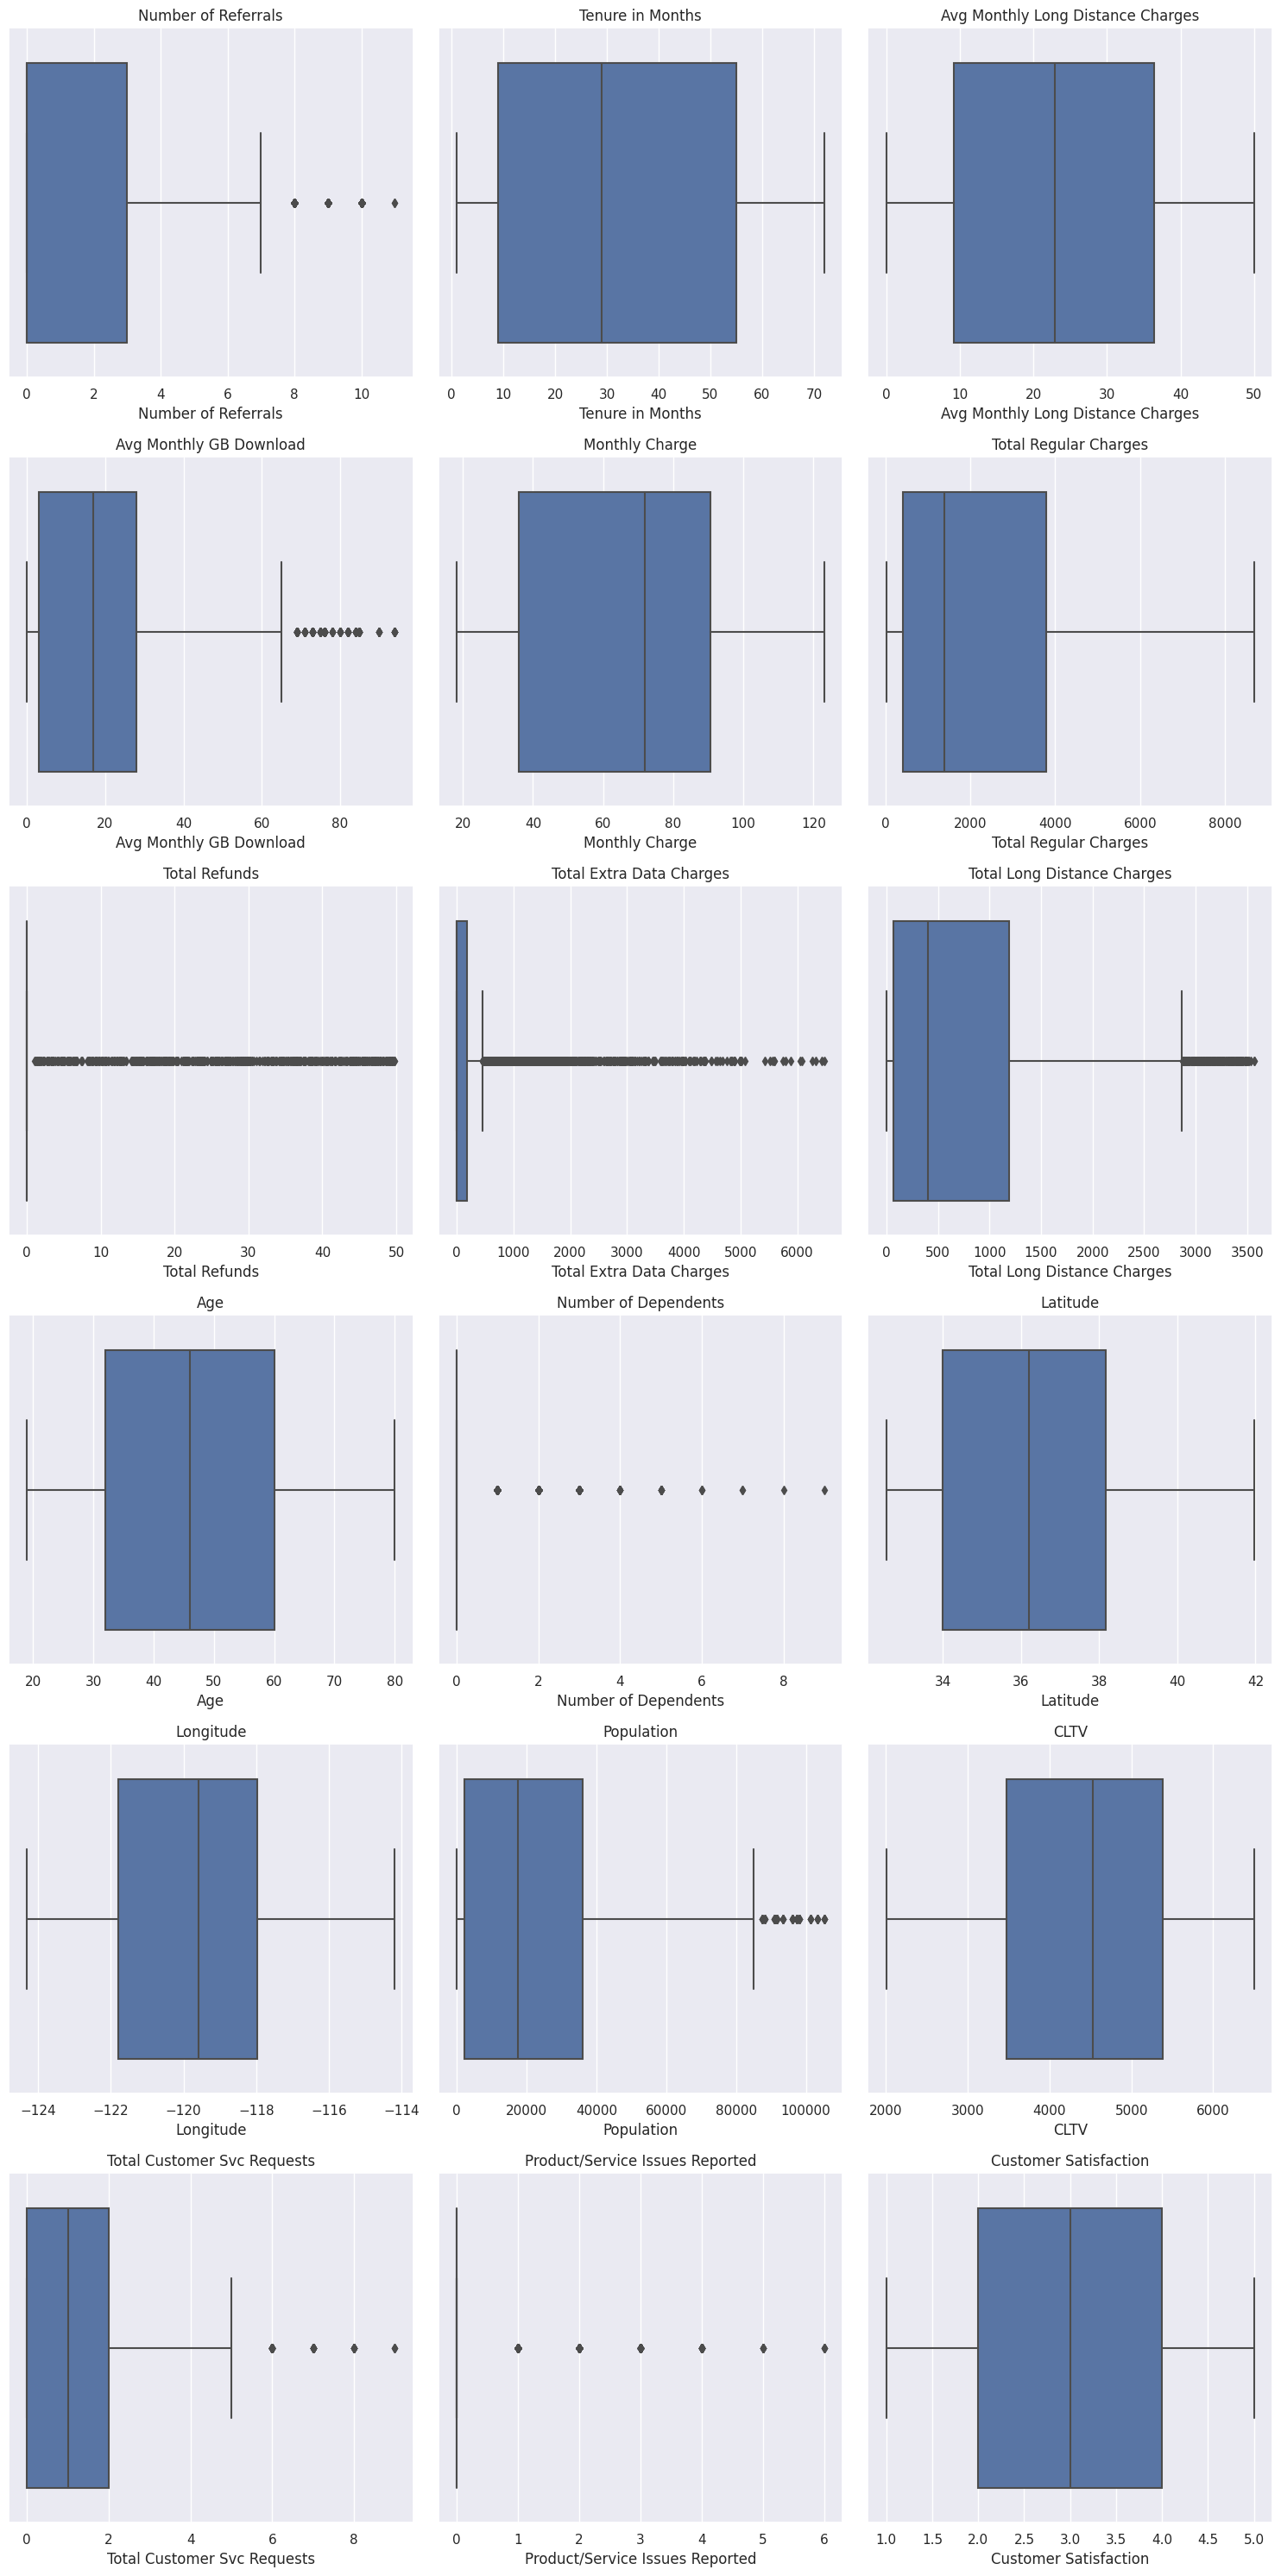

In [10]:
# Get the names of all columns with data type 'int' or 'float', excluding the specified columns
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

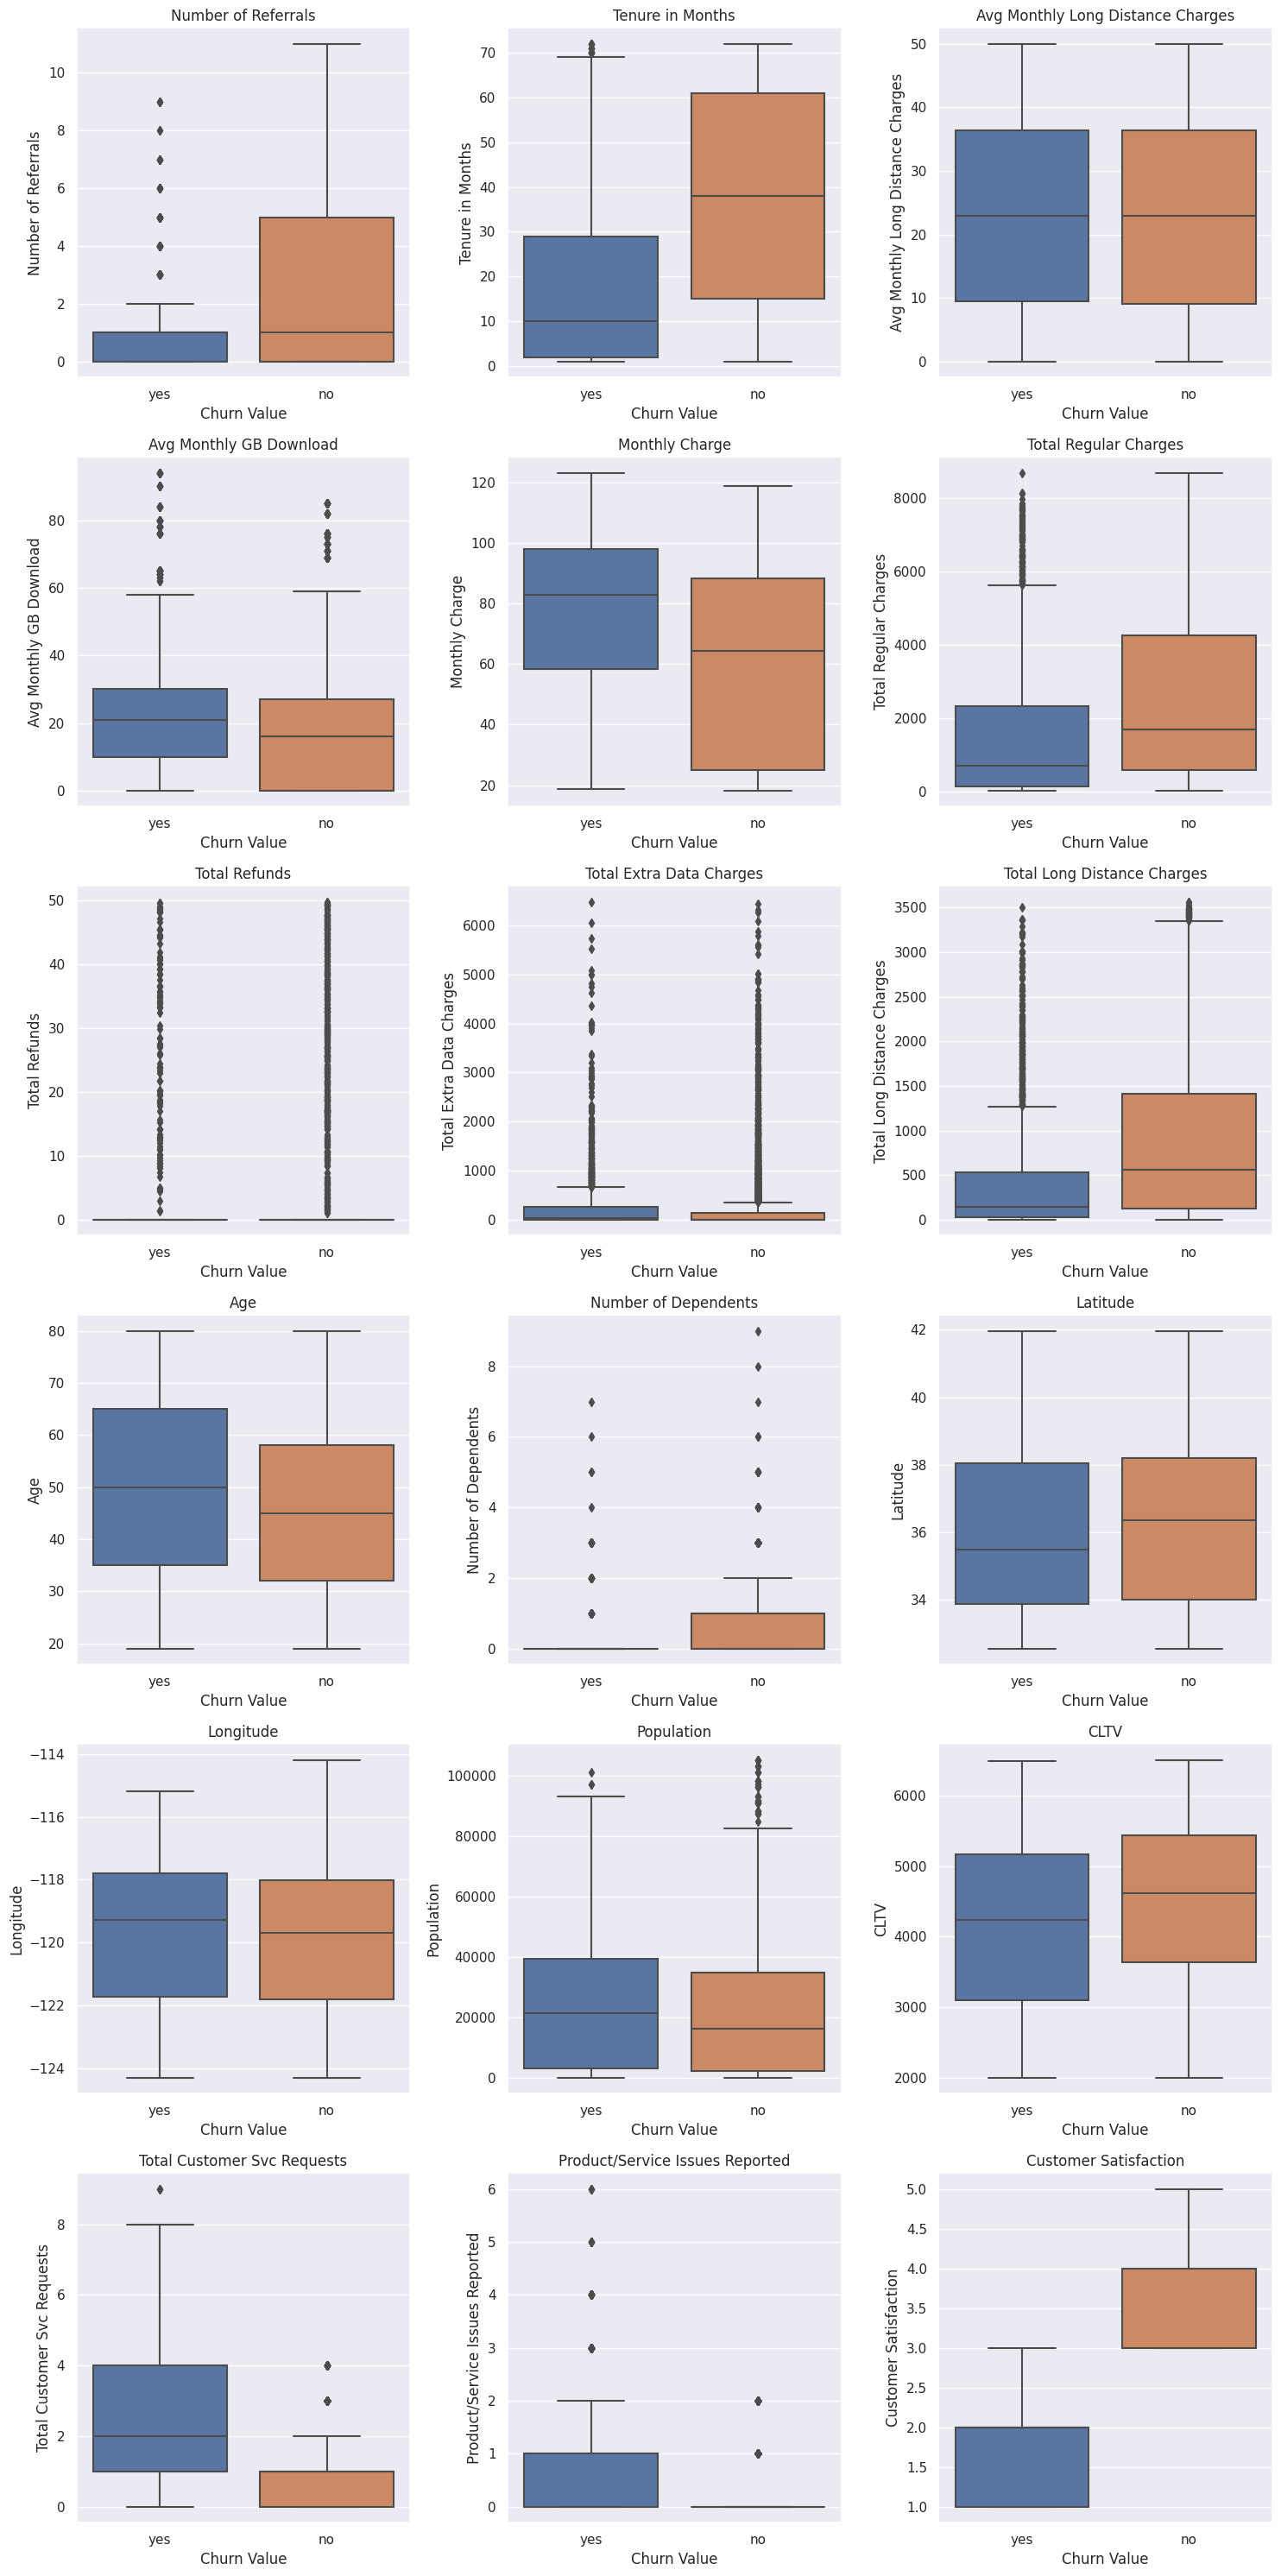

In [11]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Churn Value', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

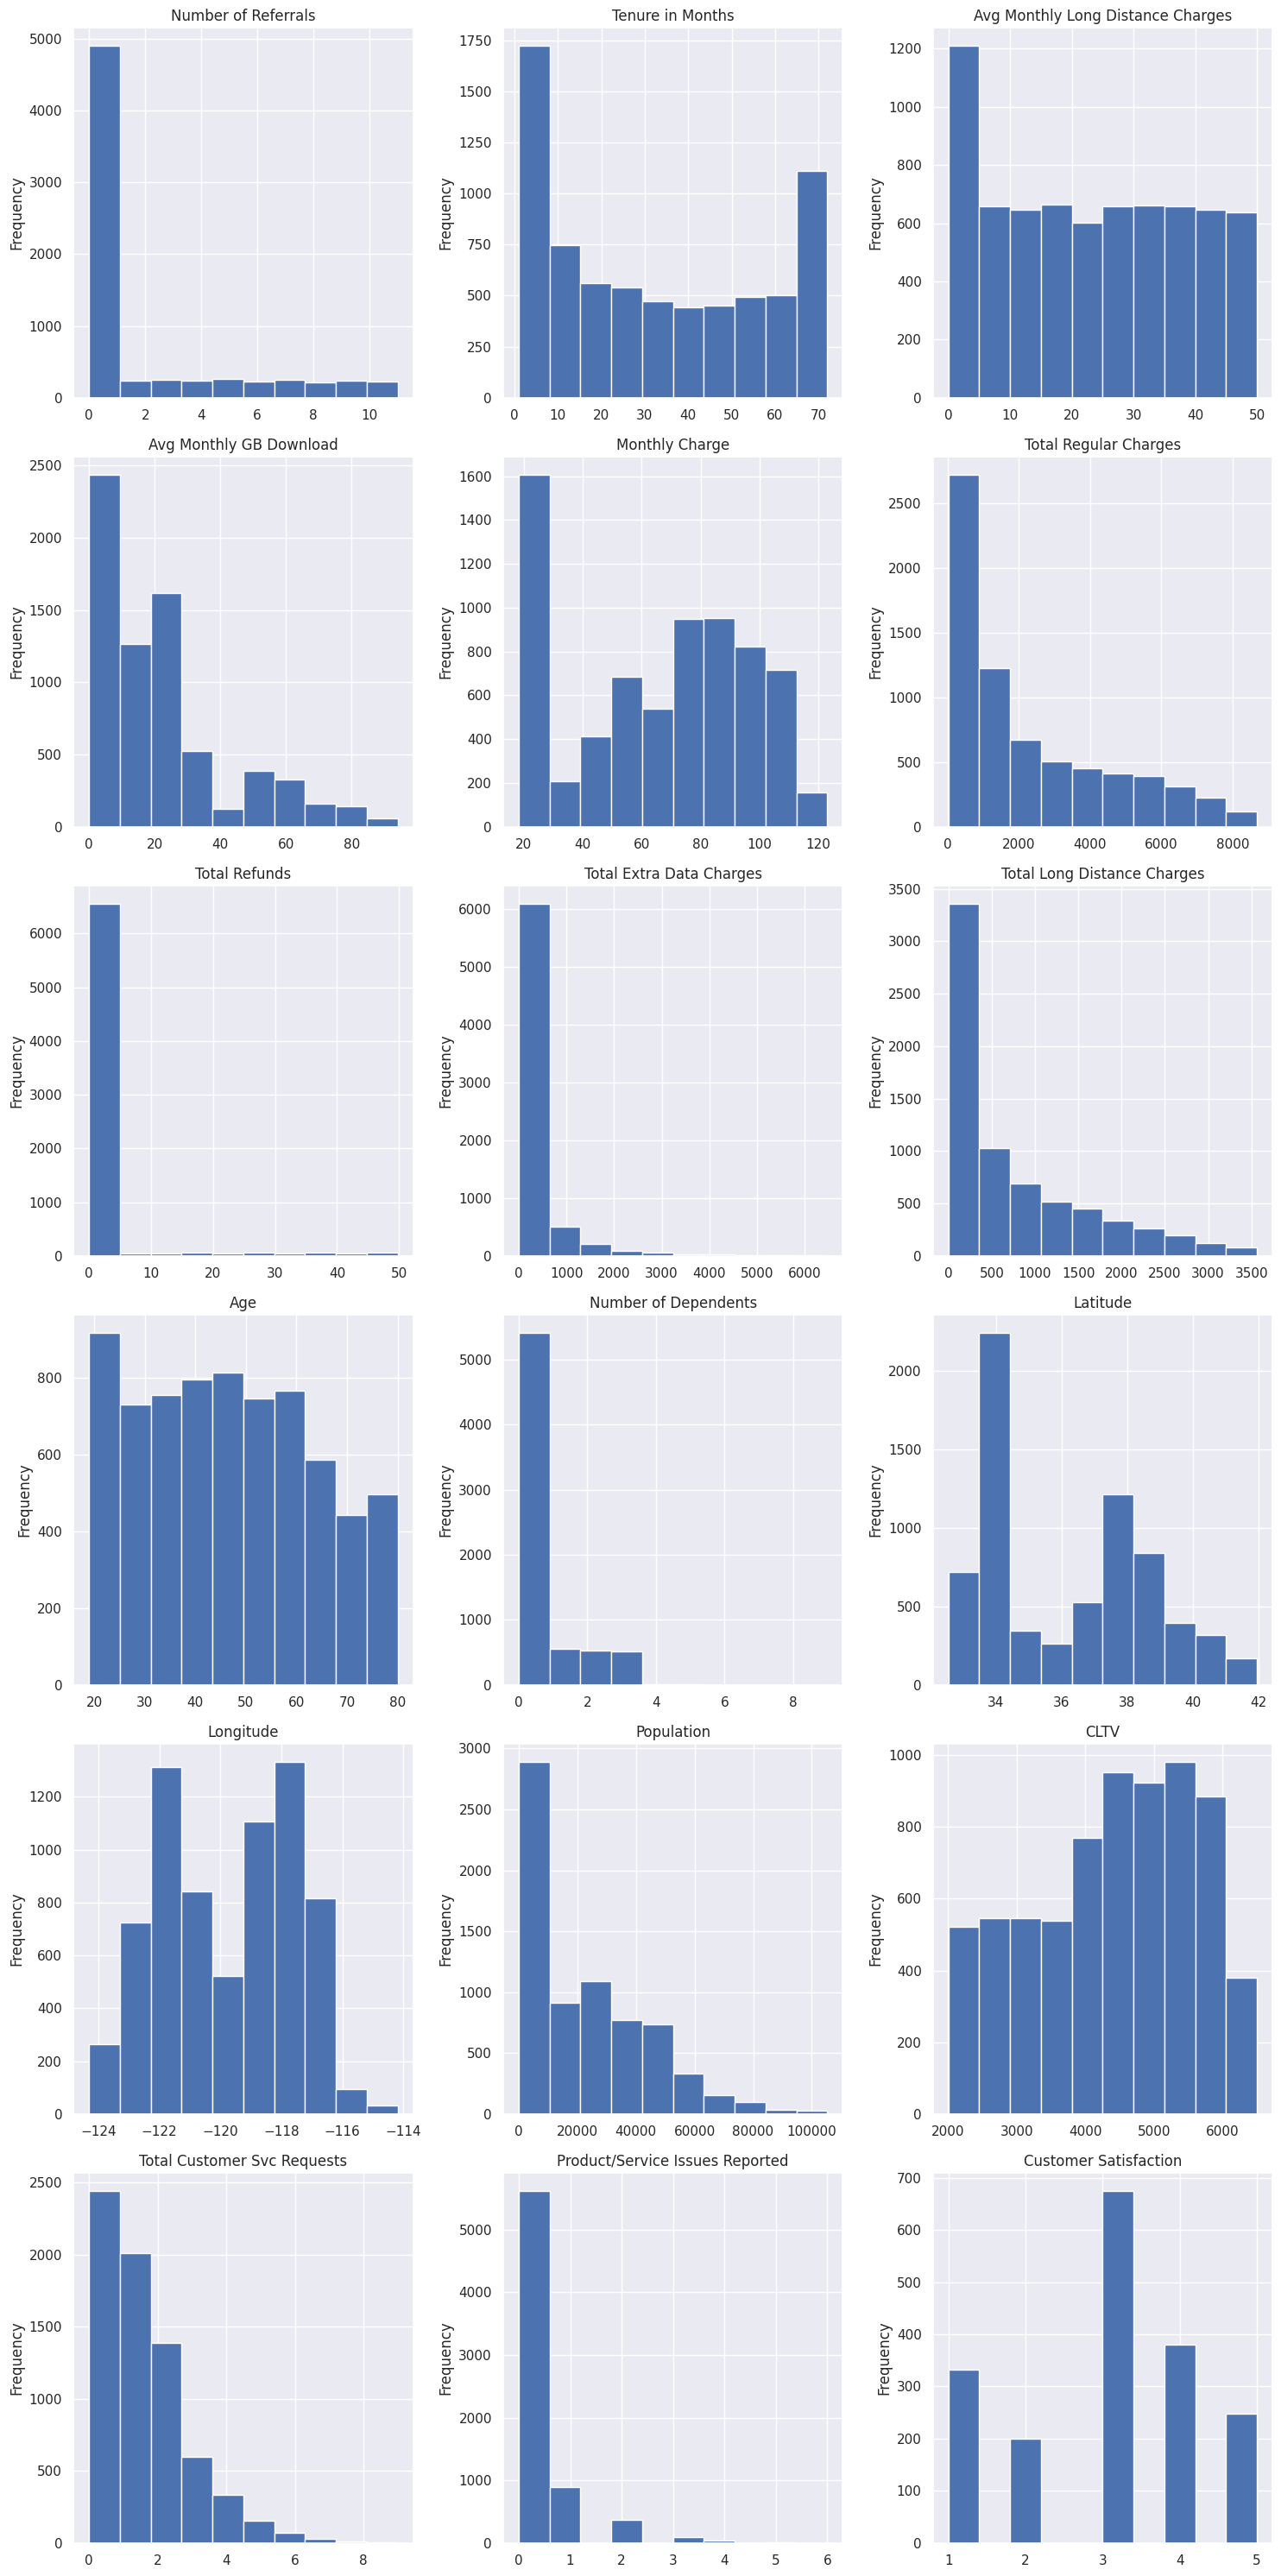

In [12]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

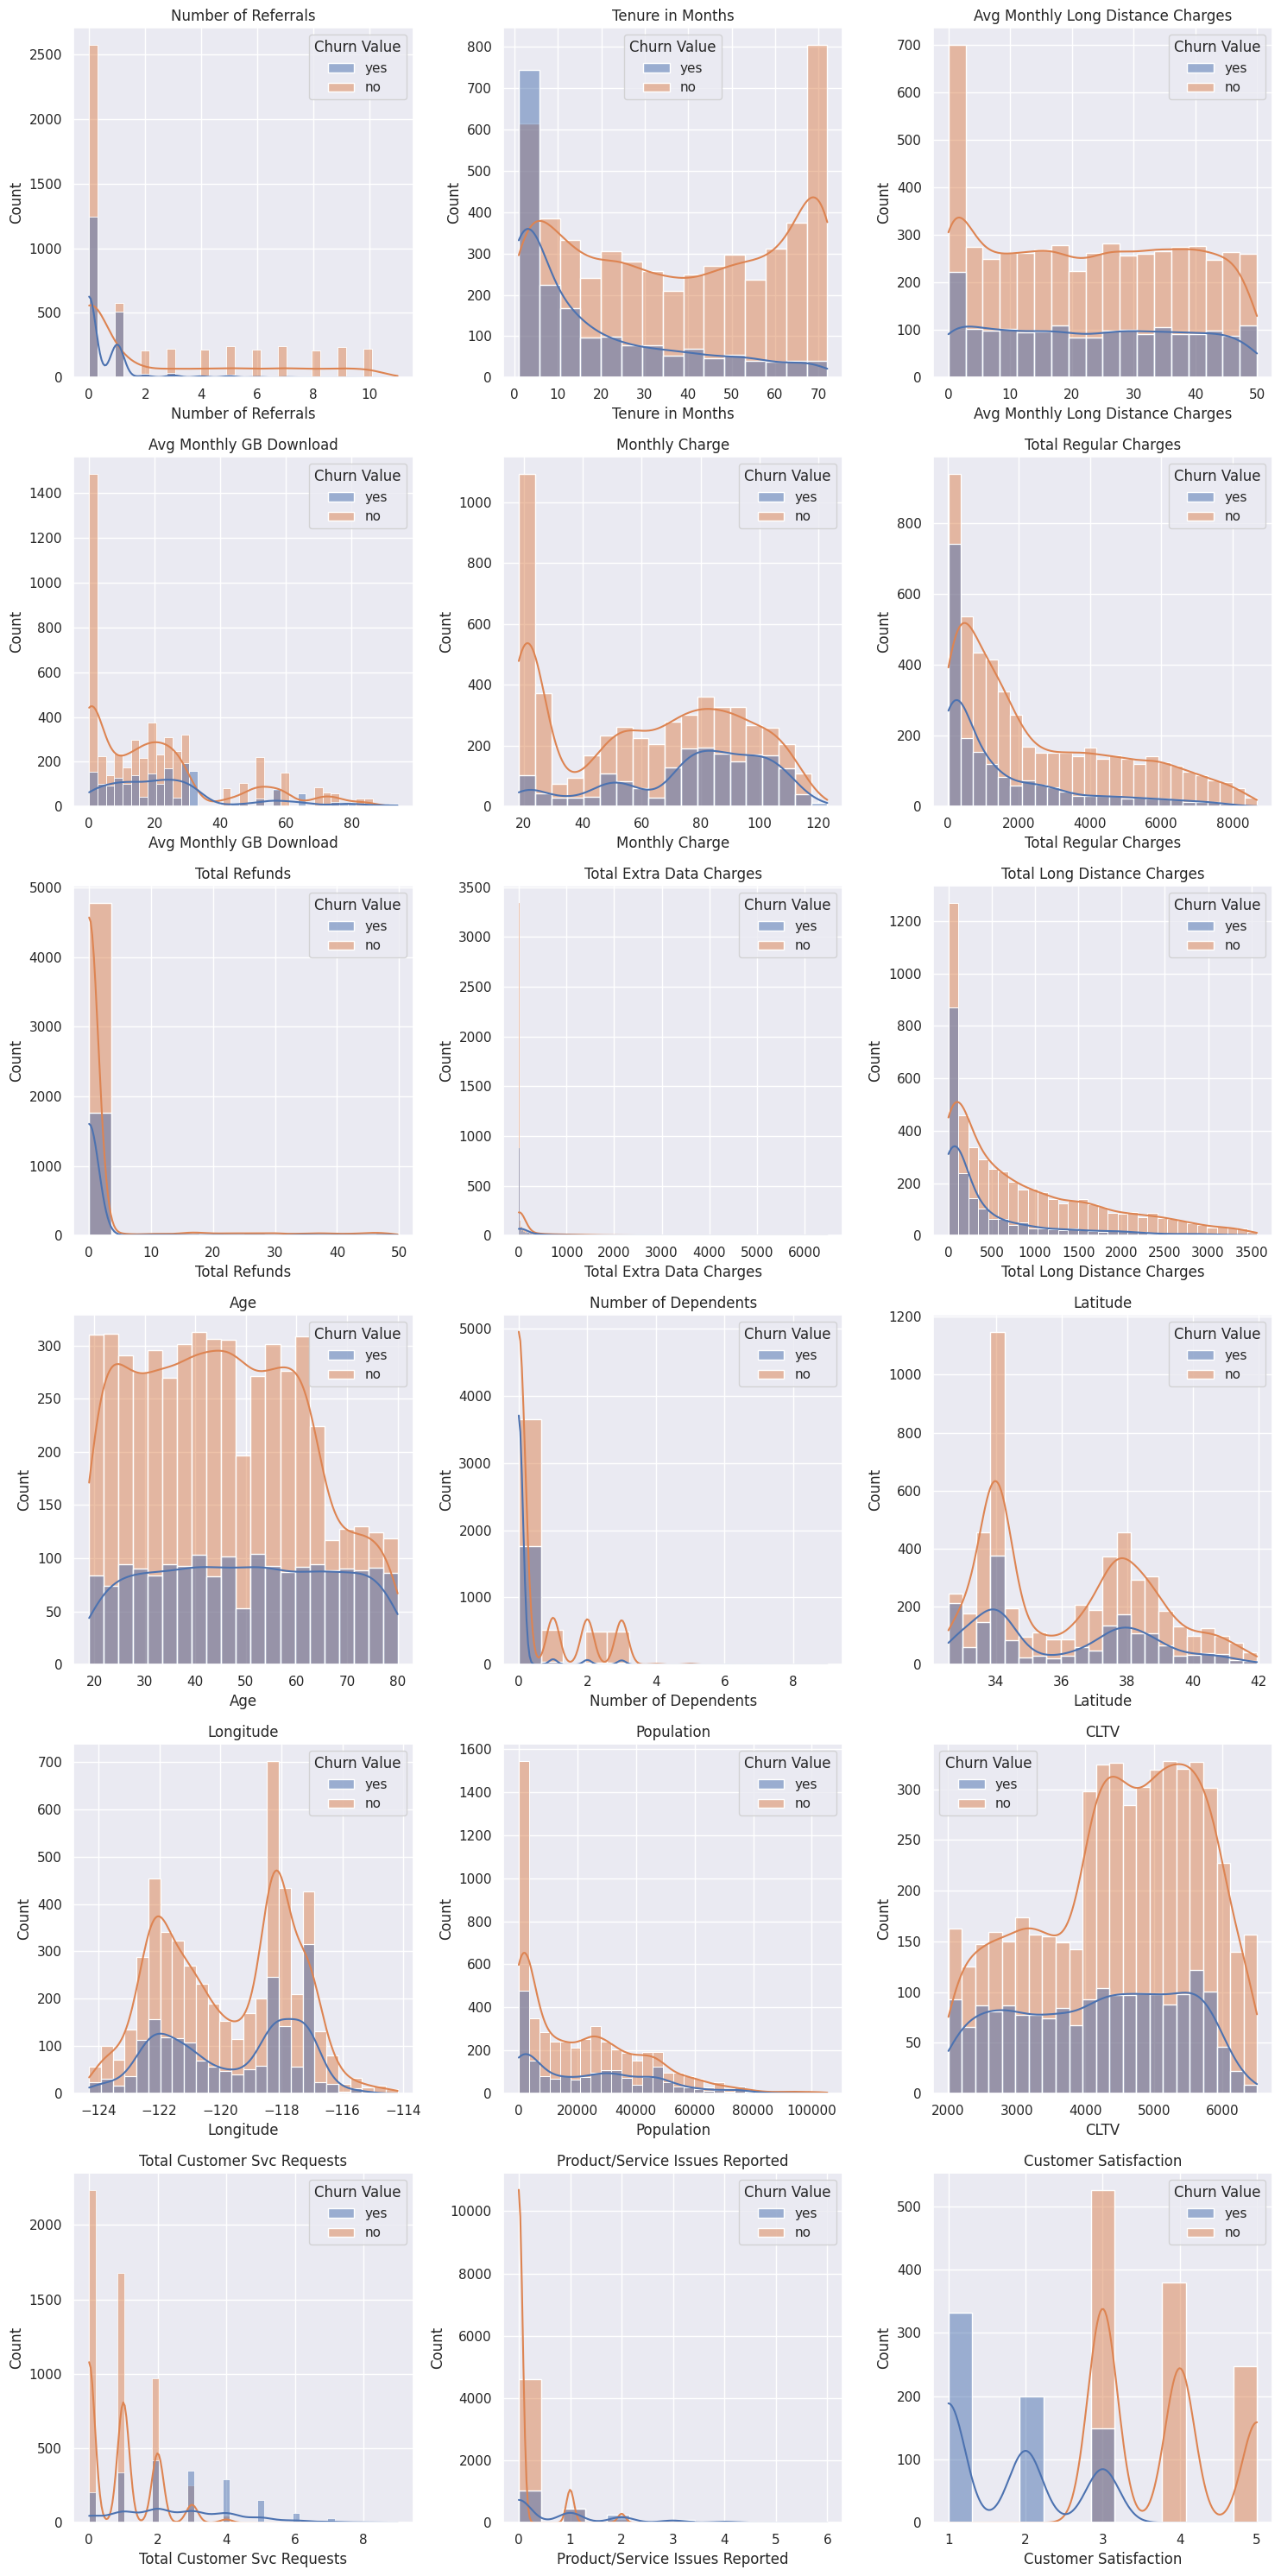

In [13]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='Churn Value', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

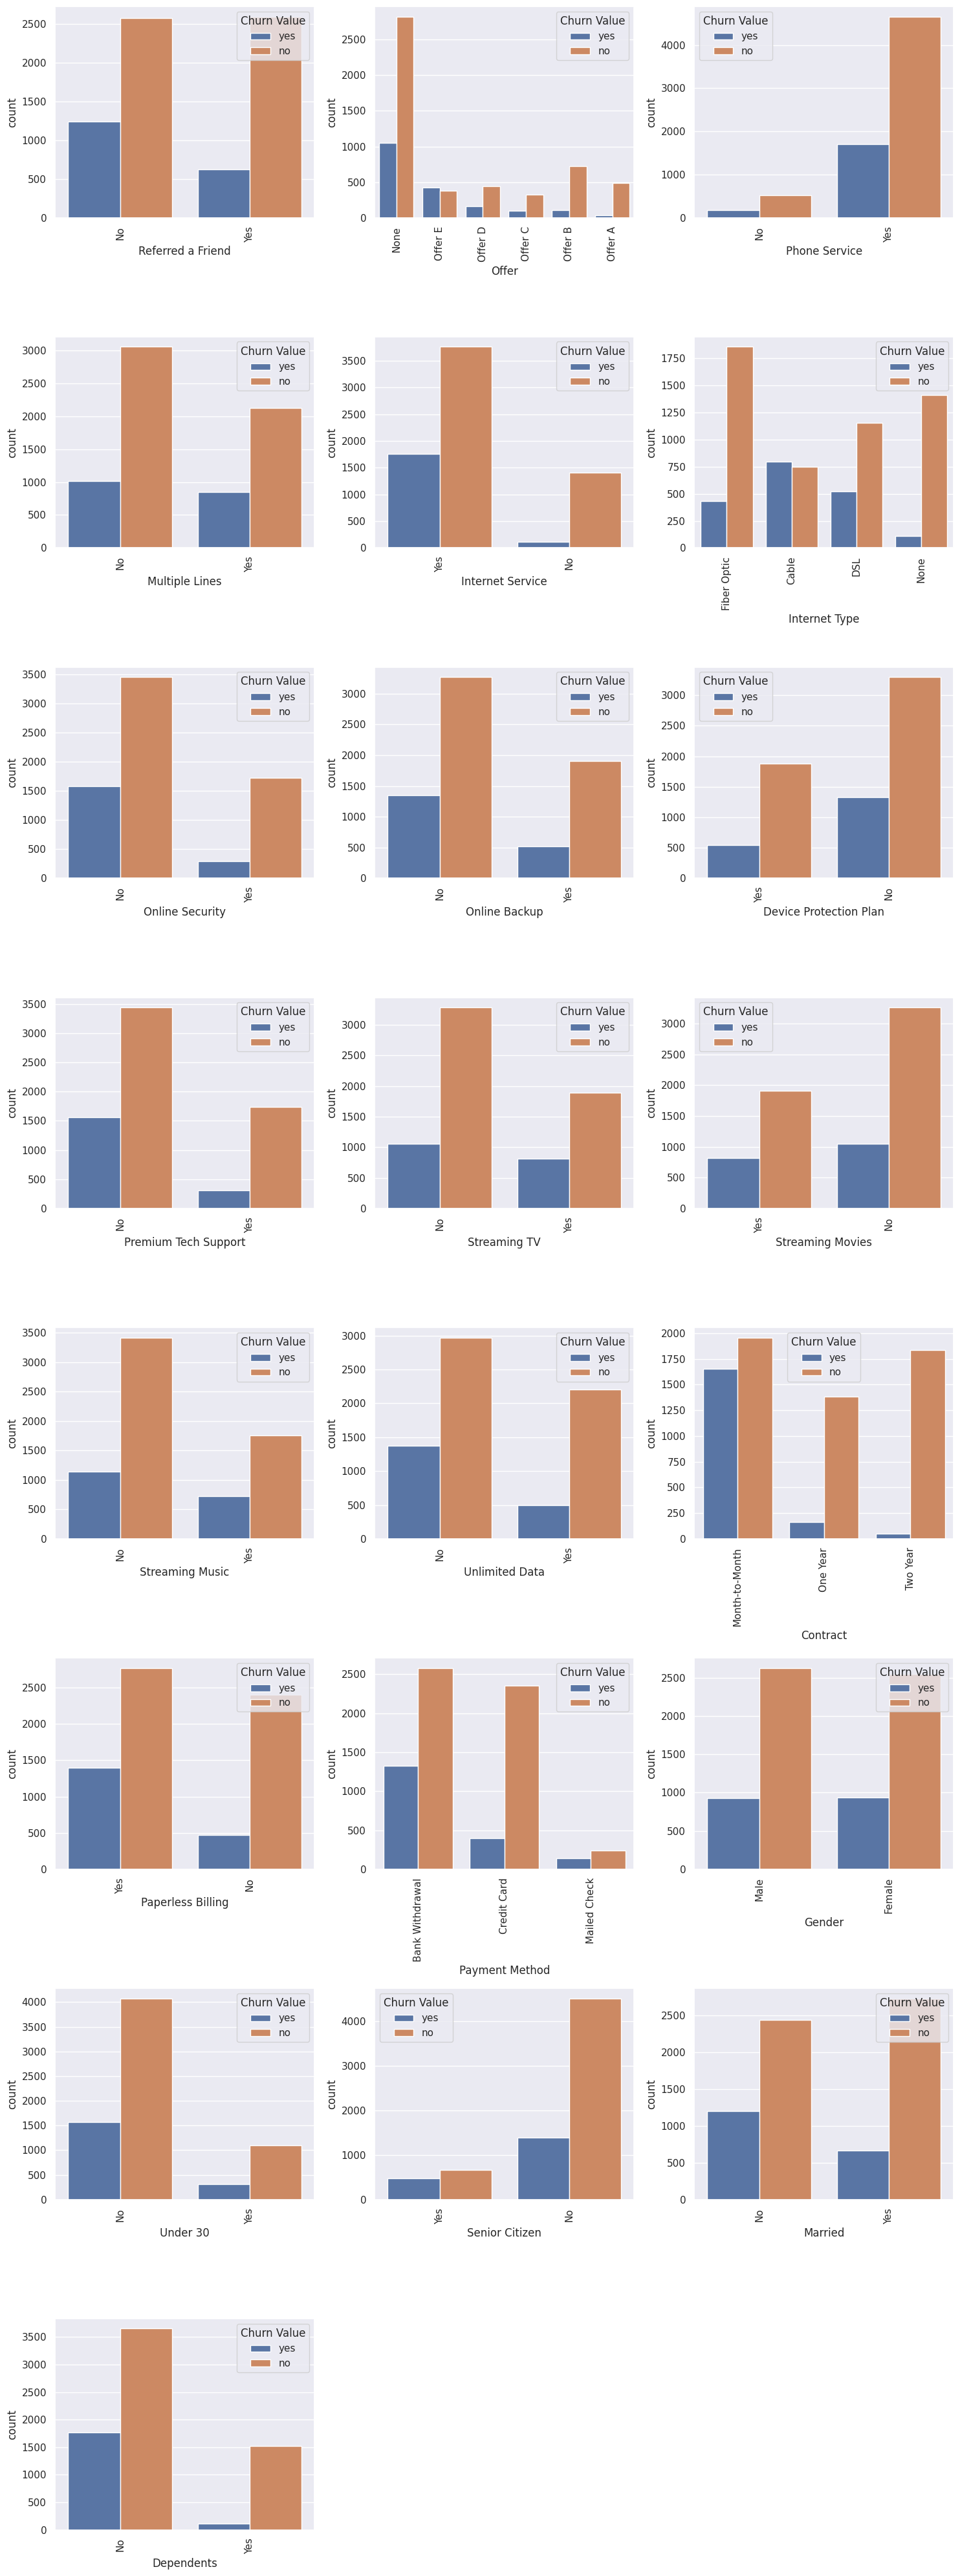

In [14]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Country' from the list if it exists in cat_vars
if 'Churn Value' in cat_vars:
    cat_vars.remove('Churn Value')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = df[df[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Churn Value', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

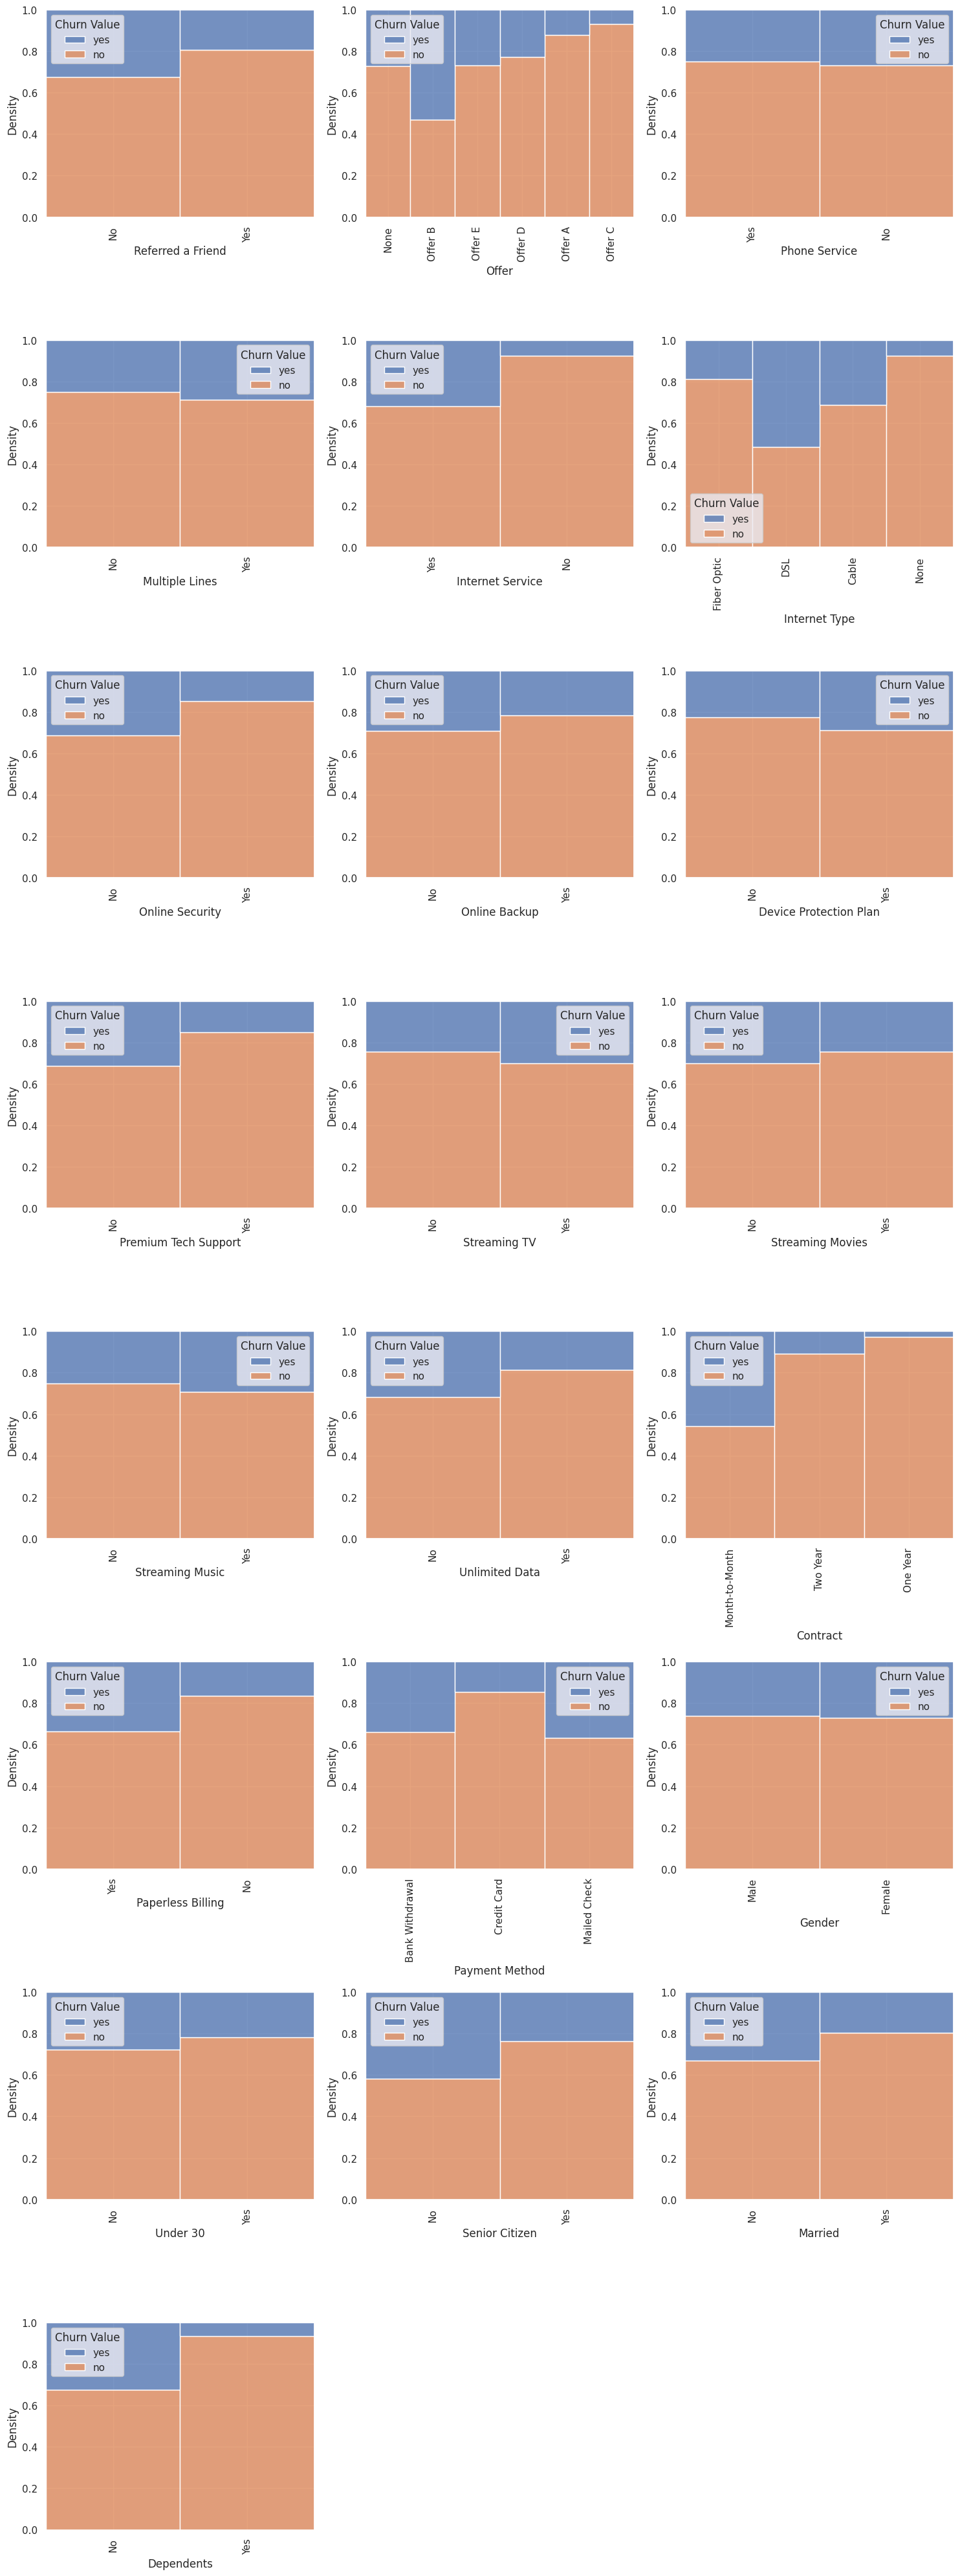

In [15]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Churn Value' in cat_vars:
    cat_vars.remove('Churn Value')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]

    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels

    sns.histplot(x=var, hue='Churn Value', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

<ipython-input-16-b77df9ffe7a1>:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


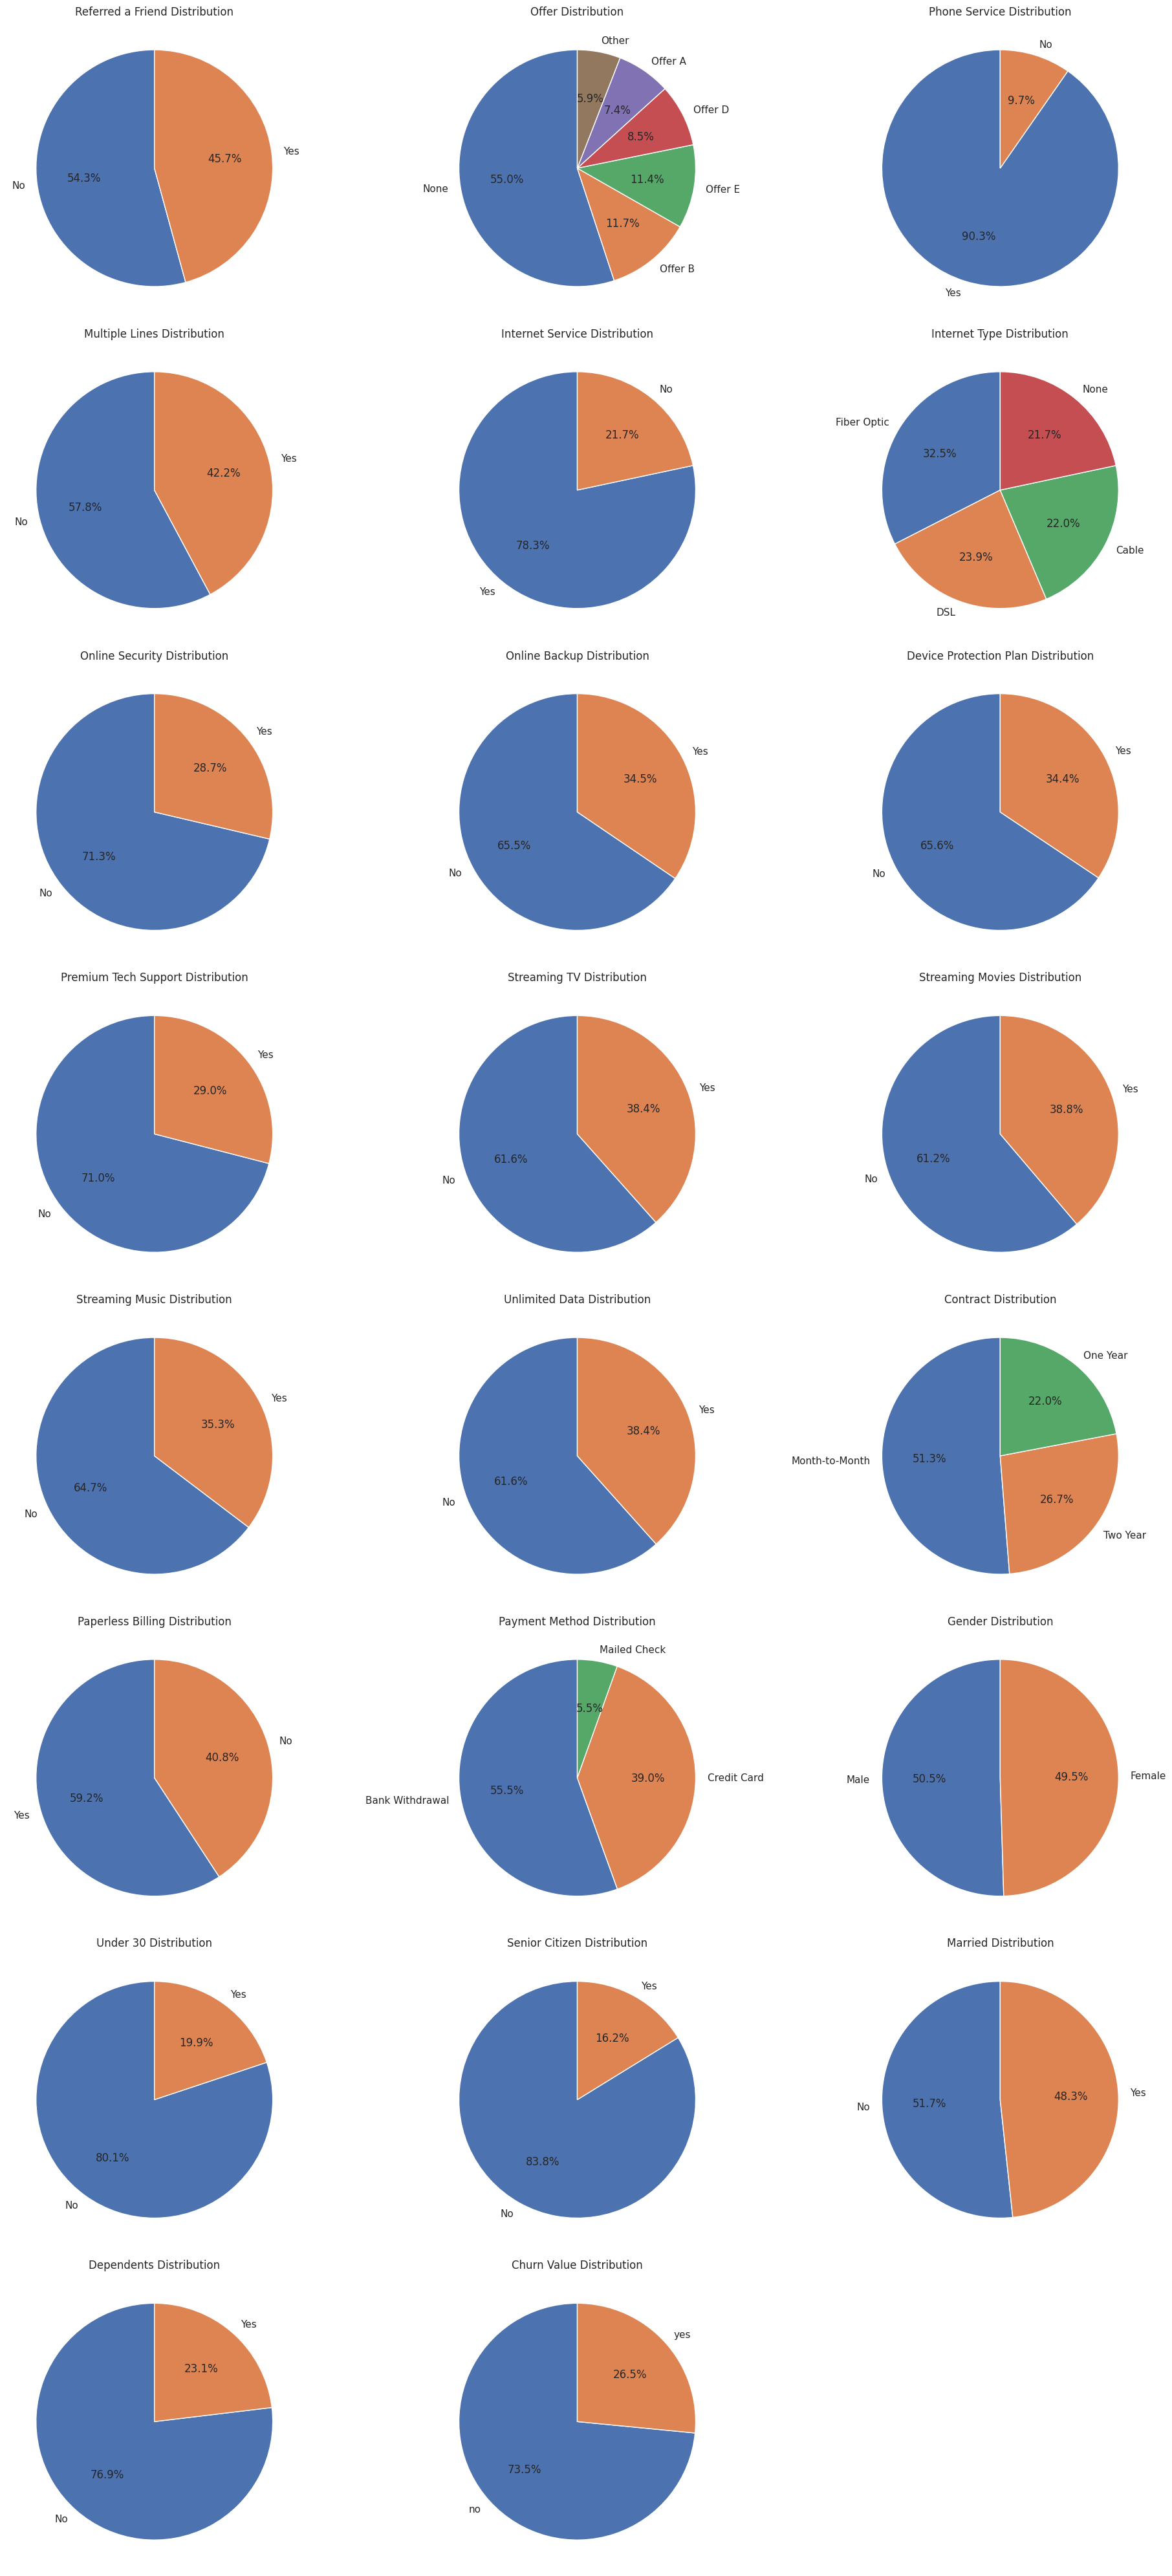

In [16]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Data Preprocessing Part 2

In [17]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Customer Satisfaction    73.95996
dtype: float64

In [18]:
# Drop Customer Satisfaction column because of 73% missing value
df.drop(columns = 'Customer Satisfaction', inplace=True)
df.shape

(7043, 40)

# Label Encoding for Object Datatypes

In [19]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Referred a Friend: ['No' 'Yes']
Offer: ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Phone Service: ['No' 'Yes']
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Internet Type: ['Fiber Optic' 'Cable' 'DSL' 'None']
Online Security: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Device Protection Plan: ['Yes' 'No']
Premium Tech Support: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['Yes' 'No']
Streaming Music: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']
Contract: ['Month-to-Month' 'One Year' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Gender: ['Male' 'Female']
Under 30: ['No' 'Yes']
Senior Citizen: ['Yes' 'No']
Married: ['No' 'Yes']
Dependents: ['No' 'Yes']
Churn Value: ['yes' 'no']


In [20]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Referred a Friend: [0 1]
Offer: [0 5 4 3 2 1]
Phone Service: [0 1]
Multiple Lines: [0 1]
Internet Service: [1 0]
Internet Type: [2 0 1 3]
Online Security: [0 1]
Online Backup: [0 1]
Device Protection Plan: [1 0]
Premium Tech Support: [0 1]
Streaming TV: [0 1]
Streaming Movies: [1 0]
Streaming Music: [0 1]
Unlimited Data: [0 1]
Contract: [0 1 2]
Paperless Billing: [1 0]
Payment Method: [0 1 2]
Gender: [1 0]
Under 30: [0 1]
Senior Citizen: [1 0]
Married: [0 1]
Dependents: [0 1]
Churn Value: [1 0]


<Axes: >

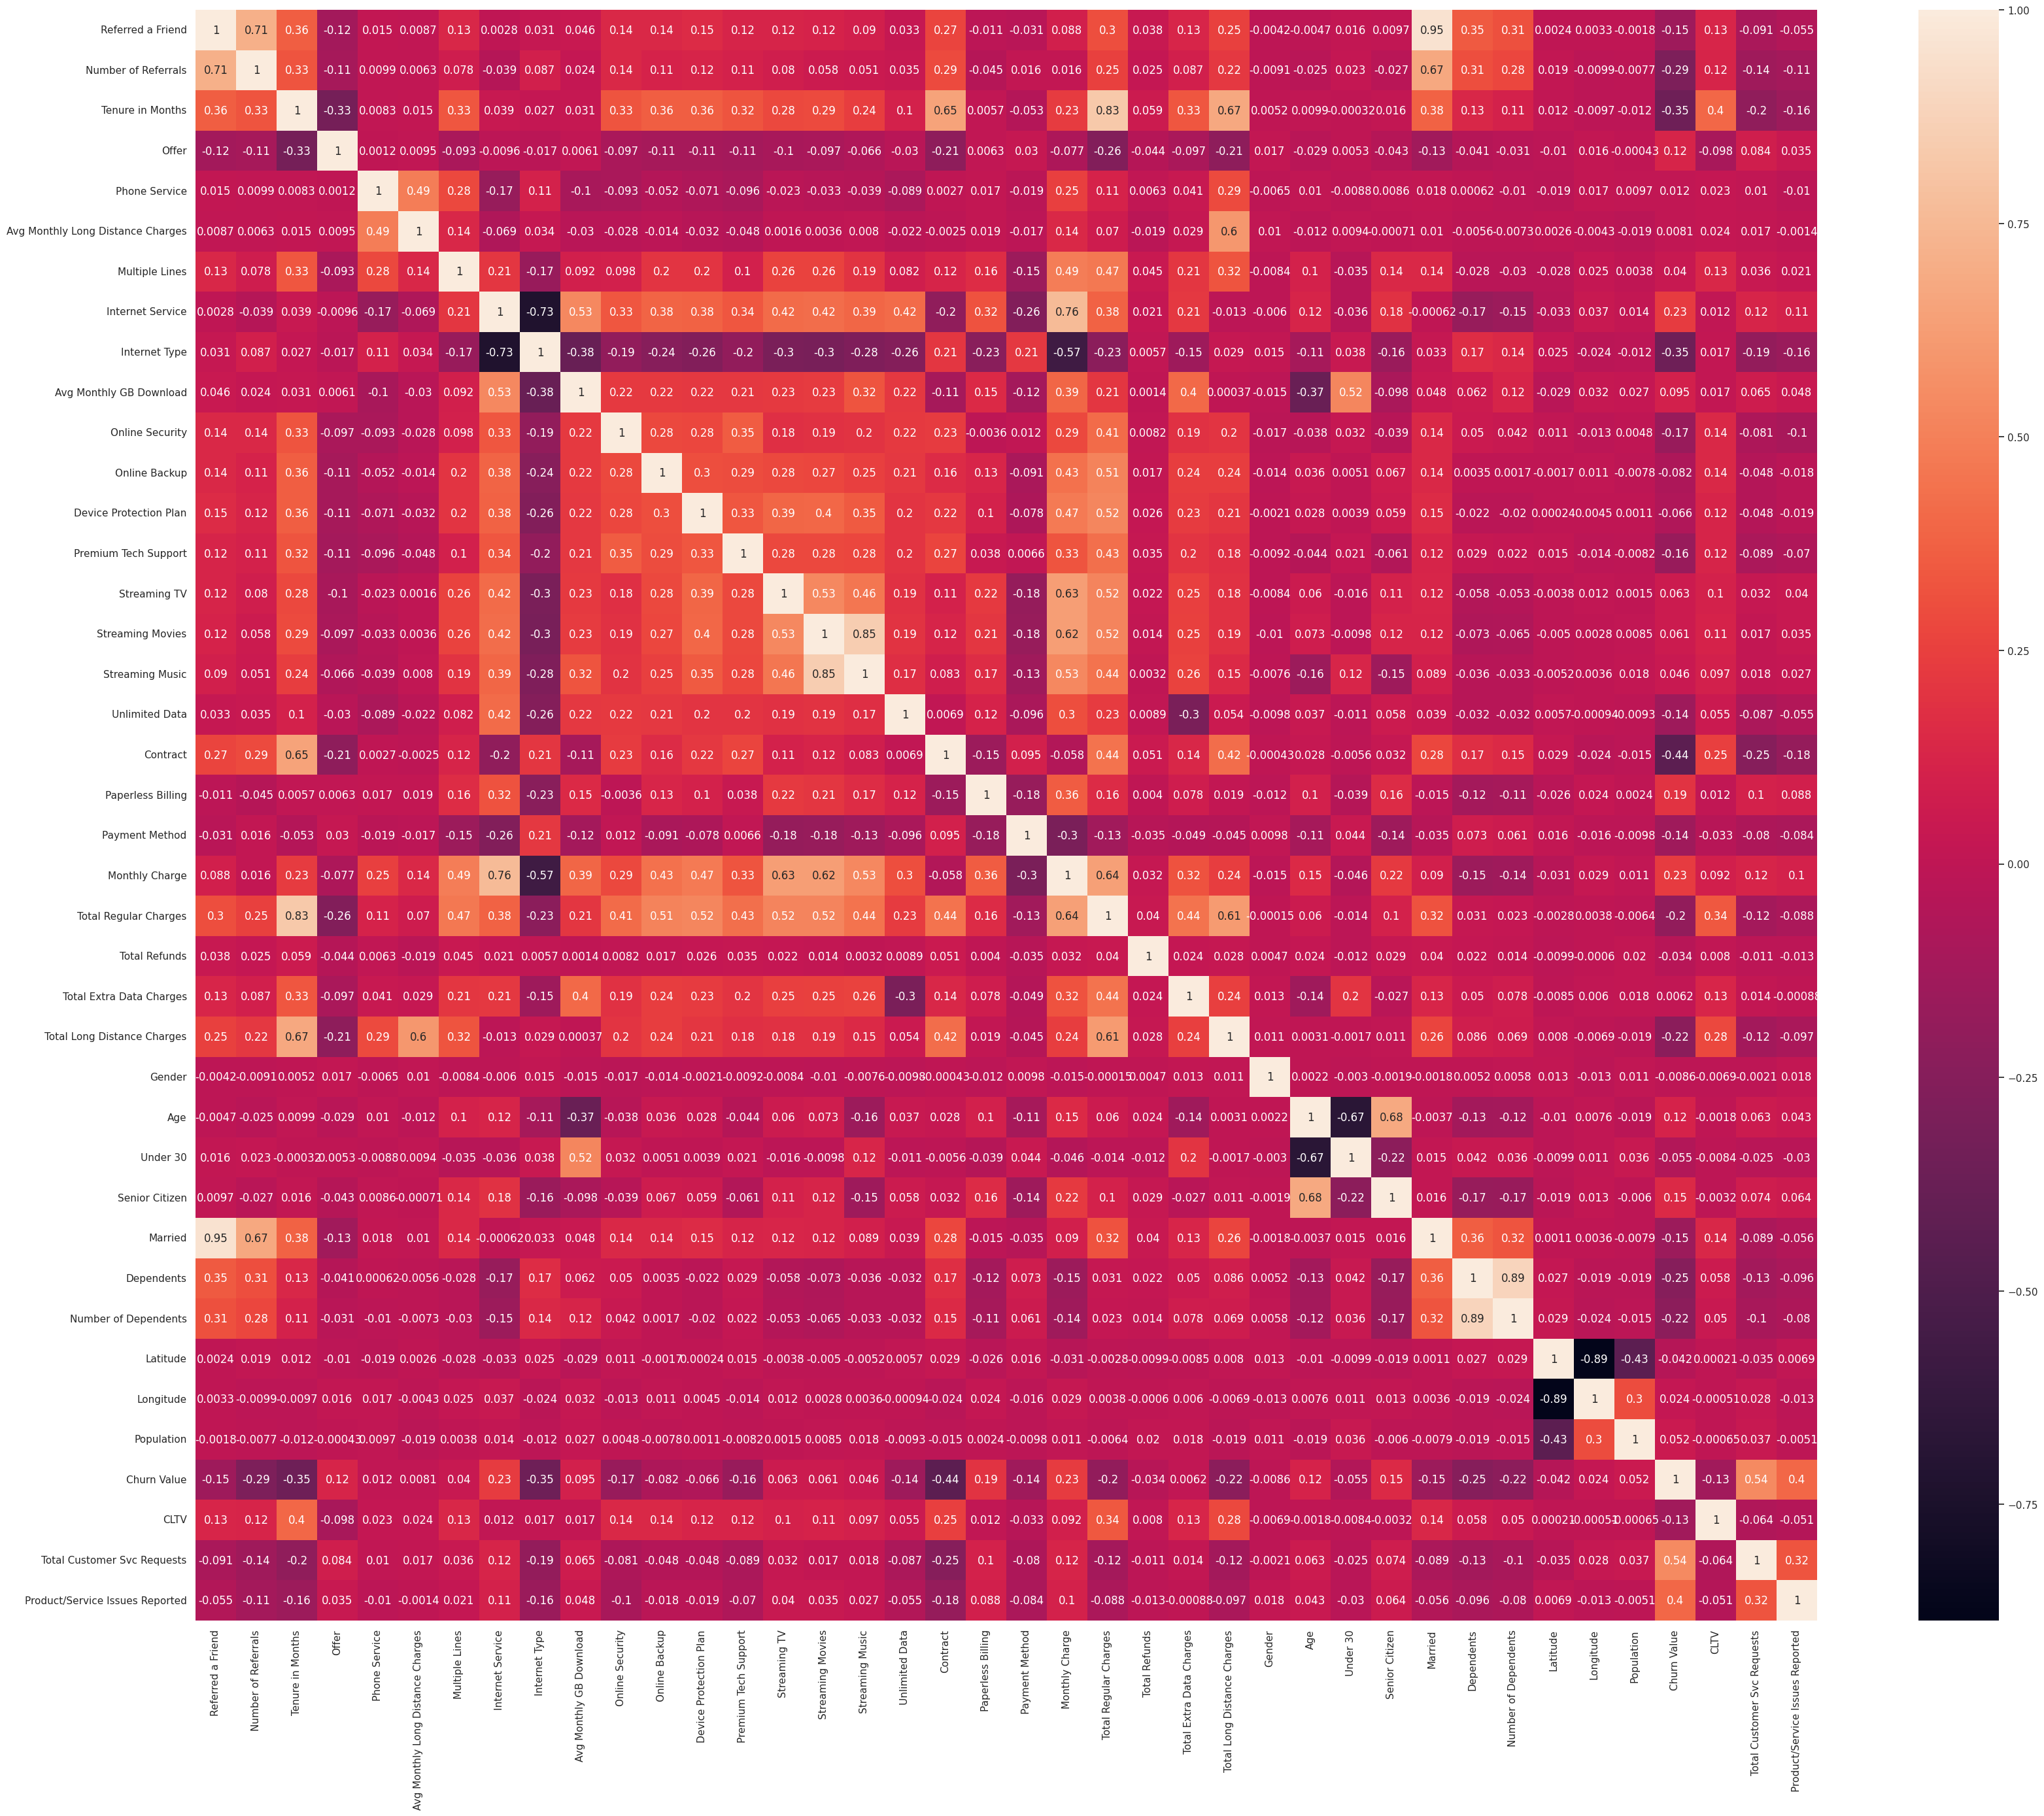

In [21]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [22]:
# Drop column that have high correlation to prevent redudancy
df.drop(columns = ['Referred a Friend', 'Number of Dependents', 'Latitude', 'Longitude', 'Total Regular Charges'], inplace=True)

In [23]:
df.shape

(7043, 35)

# Train Test Split

In [24]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Remove Outlier from Train Data using Z-Score

In [25]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges',
                    'Total Long Distance Charges', 'Population']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       random_state=42)

In [28]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.59 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8559261887863733
Precision Score :  0.8559261887863733
Recall Score :  0.8559261887863733
Jaccard Score :  0.7481389578163772
Log Loss :  4.976205788955241


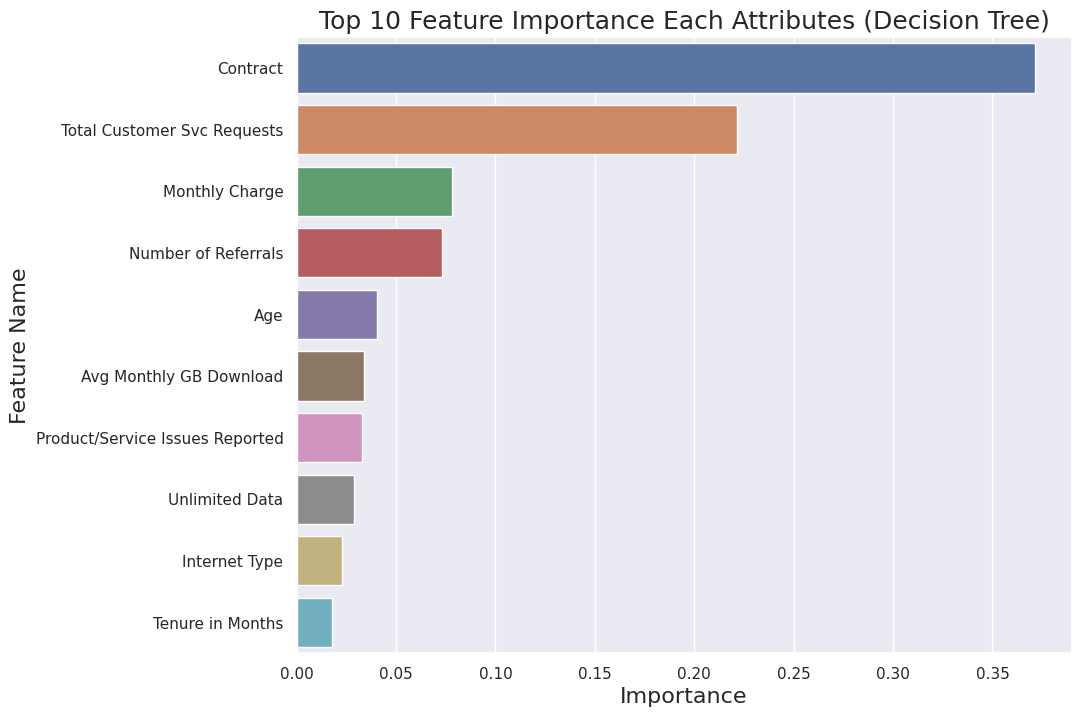

In [29]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [31]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.3 MB/s eta 0:00:00


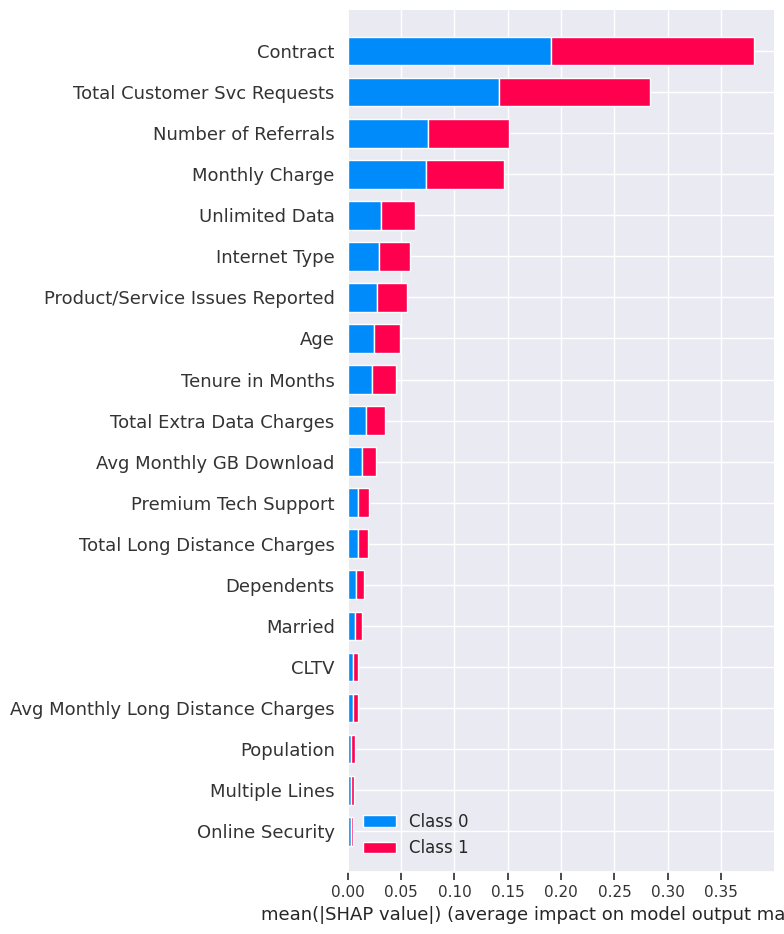

In [32]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

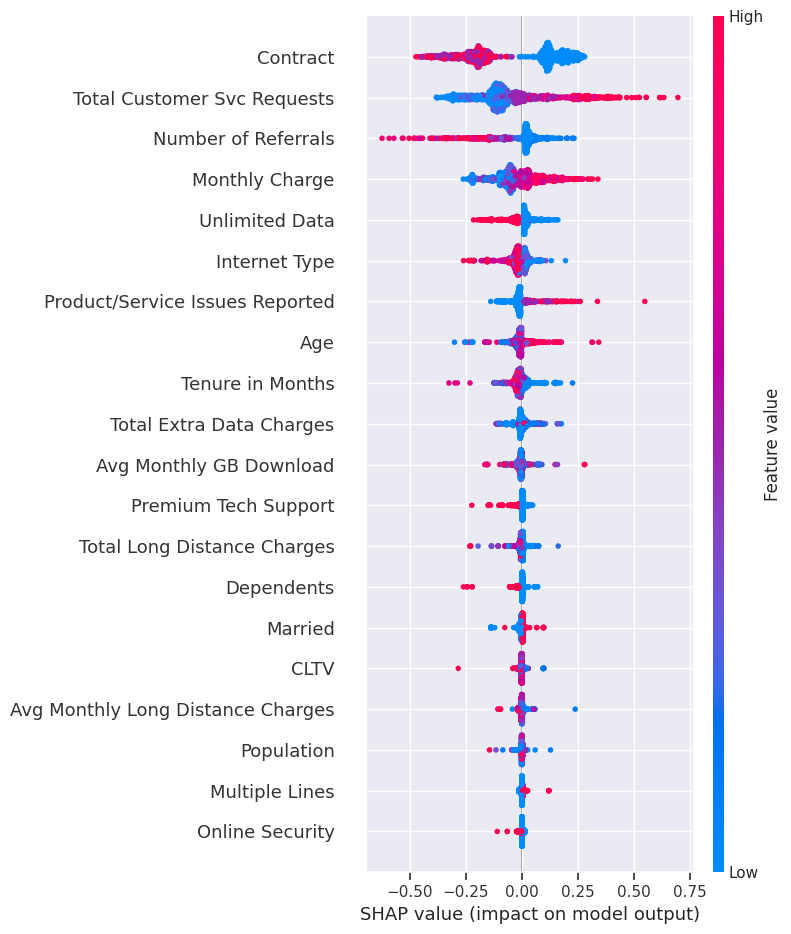

In [33]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8559261887863733')

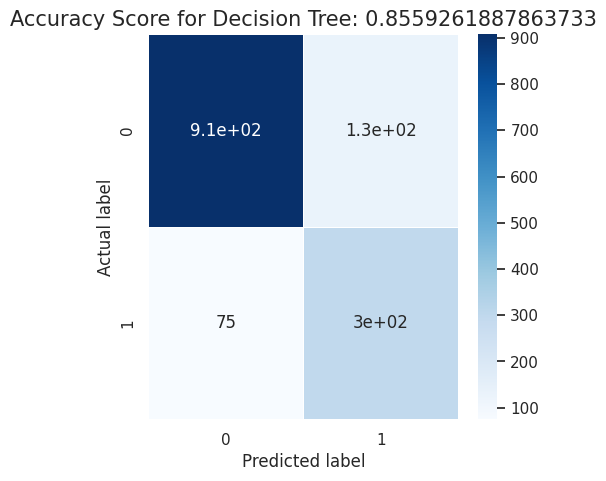

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

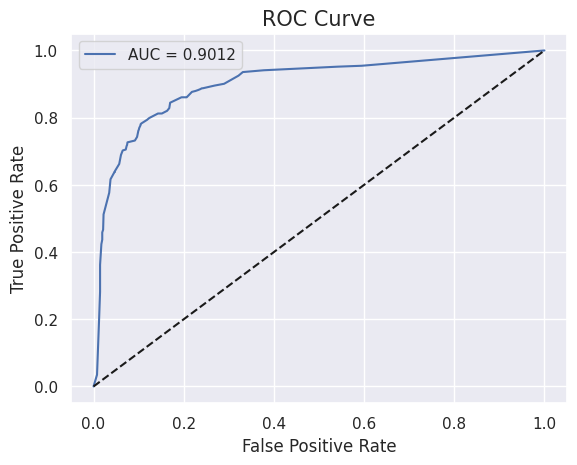

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', n_estimators=200, random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 89.07 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8907026259758695
Precision Score :  0.8907026259758695
Recall Score :  0.8907026259758695
Jaccard Score :  0.8029430582213691
Log Loss :  3.775042961398624


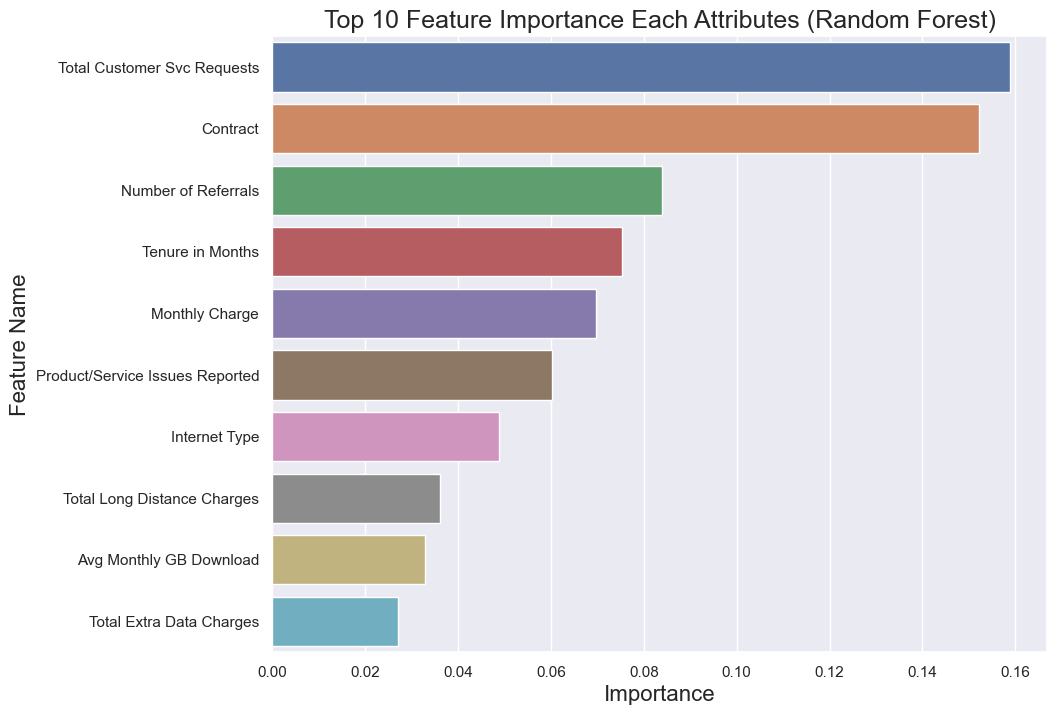

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

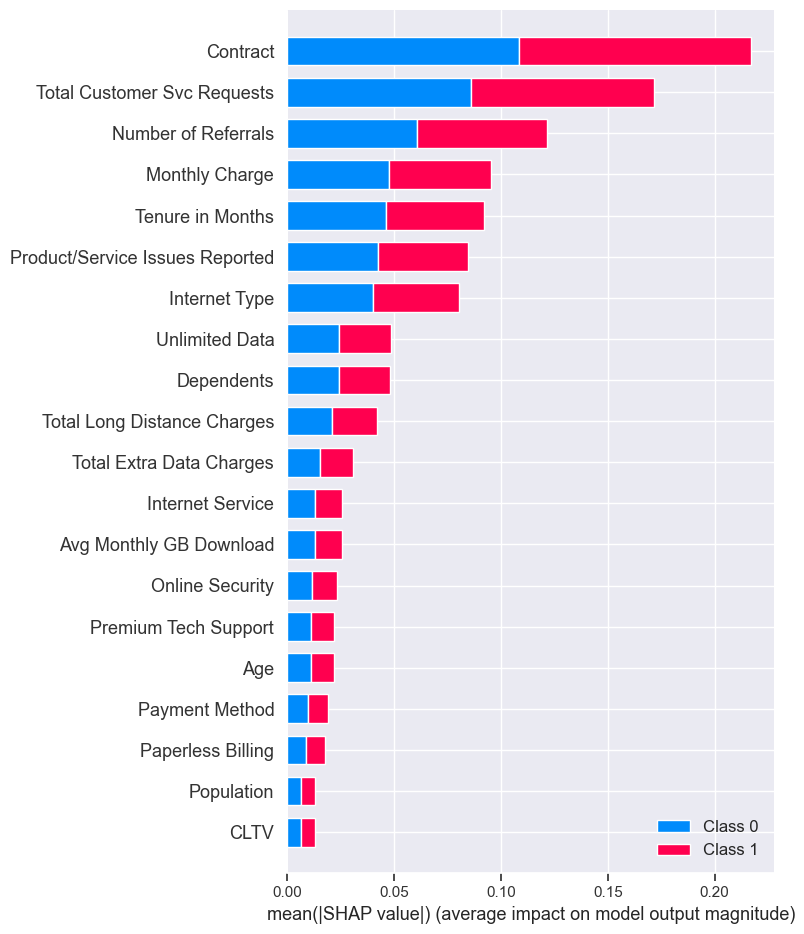

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

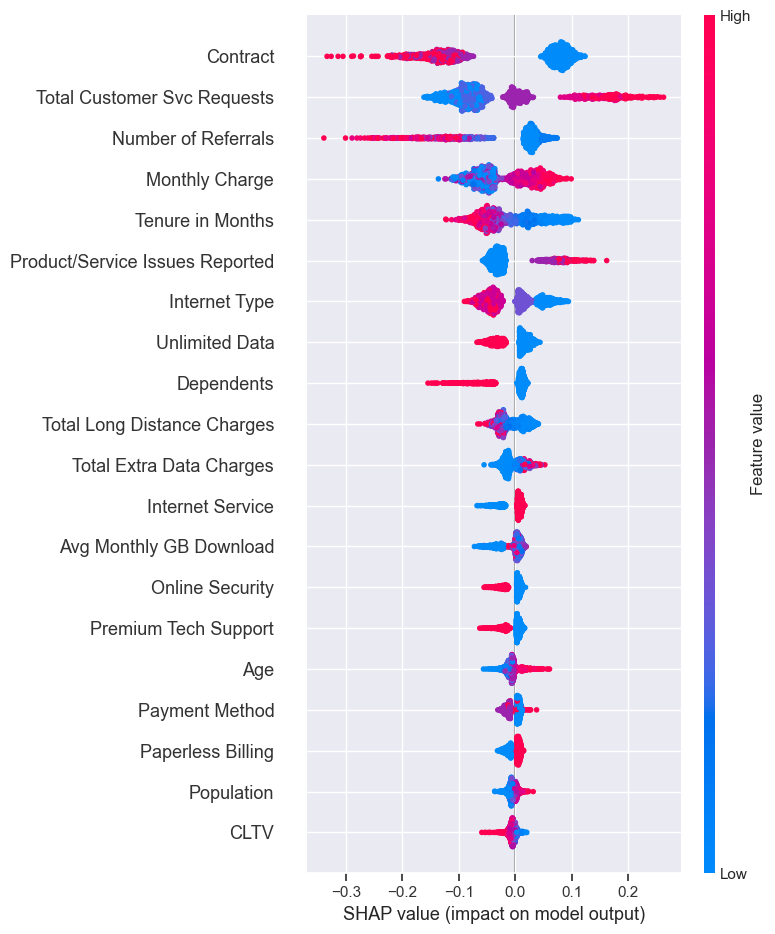

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8907026259758695')

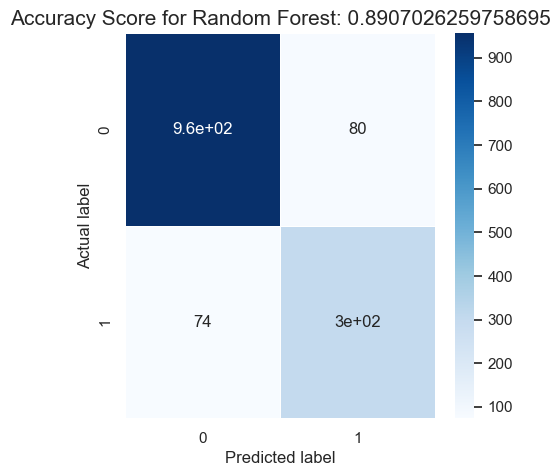

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

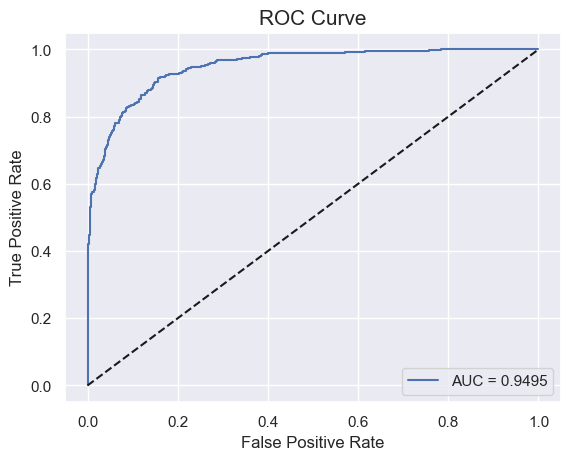

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()